In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import dynadojo.dynadojo as dd
import numpy as np

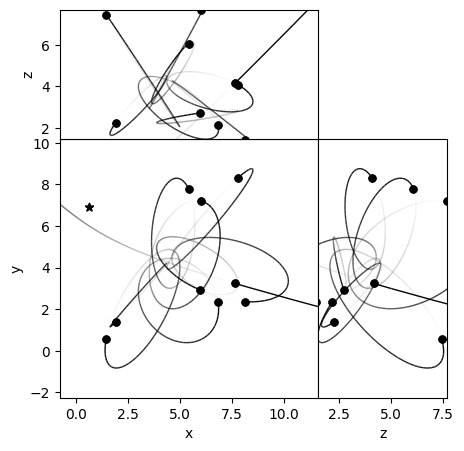

In [52]:
latent_dim = 3
embed_dim = 3
n = 10
timesteps = 100
system = dd.systems.NBodySystem(latent_dim, embed_dim, noise_scale=0, plot_data=True)
x0 = system.make_init_conds(n)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)